In [ ]:
!pip install split-folders matplotlib opencv-python spic

In [ ]:
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
splitfolders.ratio("Downloads/aug_msid/aug_mkp copy", output="Downloads/aug_msidDN121/aug_mkp copy/DN_TrueFalse", seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None, move=False)

Copying files: 5680 files [09:35,  9.86 files/s]


In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
class_names = ['Chickenpox','Measles','Monkeypox','Normal']

In [ ]:
train_generator = datagen.flow_from_directory(
    directory="Downloads/aug_msidDN121/aug_mkp copy/DN_TrueFalse/train",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)

Found 4543 images belonging to 4 classes.


In [ ]:
valid_generator = datagen.flow_from_directory(
    directory="Downloads/aug_msidDN121/aug_mkp copy/DN_TrueFalse/val",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 565 images belonging to 4 classes.


In [ ]:
test_generator = datagen.flow_from_directory(
    directory="Downloads/aug_msidDN121/aug_mkp copy/DN_TrueFalse/test/",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 572 images belonging to 4 classes.


In [ ]:
import tensorflow as tf

DN121 = tf.keras.applications.densenet.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    classes=4,
    classifier_activation="softmax"
)
#print(DN121.summary())


In [ ]:
split_point = len(DN121.layers) // 2
for layer in (DN121.layers)[:split_point]:
    layer.trainable = False

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

DN121_model = Sequential()
DN121_model.add(DN121)
DN121_model.add(Flatten())
DN121_model.add(Dense(256, activation='relu'))
DN121_model.add(Dense(4, activation='softmax'))

In [ ]:
DN121_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 module_wrapper (ModuleWrap  (None, 50176)             0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 256)               12845312  
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 4)                 1028      
 apper)                                                          
                                                                 
Total params: 19883844 (75.85 MB)
Trainable params: 17478212 (66.67 MB)
Non-trainable params: 2405632 (9.18 MB)
__________

In [ ]:
DN121_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=15
history = DN121_model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs
)

Epoch 1/15
142/142 [==============================] - 3830s 26s/step - loss: 0.7475 - accuracy: 0.7838 - val_loss: 0.1837 - val_accuracy: 0.9310
Epoch 2/15
142/142 [==============================] - 9878s 70s/step - loss: 0.0738 - accuracy: 0.9740 - val_loss: 0.0973 - val_accuracy: 0.9681
Epoch 3/15
142/142 [==============================] - 1317s 9s/step - loss: 0.0495 - accuracy: 0.9844 - val_loss: 0.0840 - val_accuracy: 0.9770
Epoch 4/15
142/142 [==============================] - 1407s 10s/step - loss: 0.0173 - accuracy: 0.9954 - val_loss: 0.0944 - val_accuracy: 0.9752
Epoch 5/15
142/142 [==============================] - 1570s 11s/step - loss: 0.0152 - accuracy: 0.9947 - val_loss: 0.0913 - val_accuracy: 0.9788
Epoch 6/15
142/142 [==============================] - 3655s 26s/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0788 - val_accuracy: 0.9770
Epoch 7/15
142/142 [==============================] - 3517s 25s/step - loss: 0.0236 - accuracy: 0.9934 - val_loss: 0.1008 - val_acc

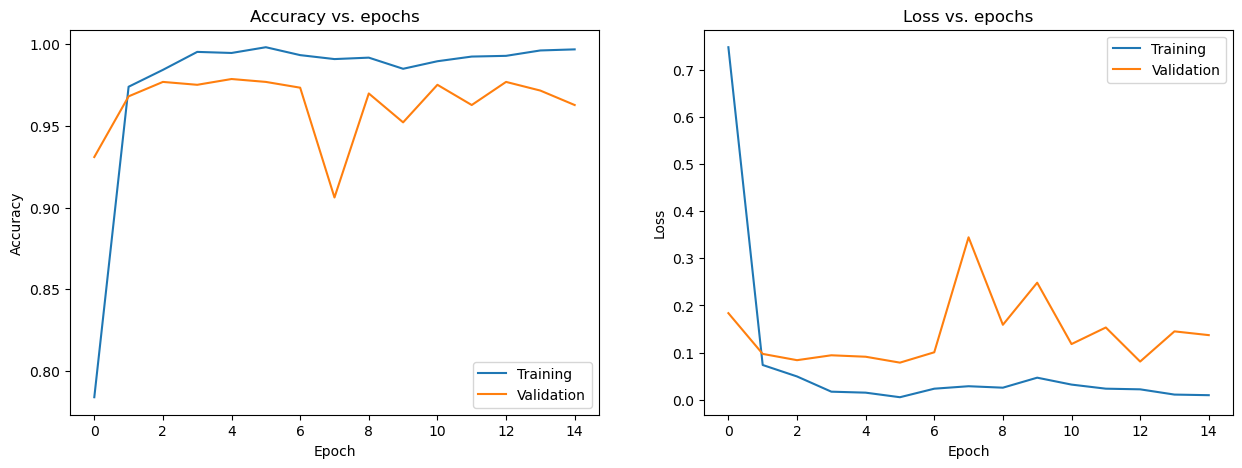

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#Evaluate the model
test_loss, test_acc = DN121_model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc)

18/18 [==============================] - 279s 16s/step - loss: 0.1592 - accuracy: 0.9668
The test loss is:  0.15917058289051056
The best accuracy is:  0.9667832255363464


In [ ]:
DN121_model.save('my_DN121_TF_model')

INFO:tensorflow:Assets written to: my_DN121_TF_model\assets


INFO:tensorflow:Assets written to: my_DN121_TF_model\assets


18/18 [==============================] - 220s 12s/step
Confusion Matrix:
[[36 28 40 38]
 [39 39 30 35]
 [31 49 33 29]
 [37 36 30 42]]

Classification Report:
              precision    recall  f1-score   support

  Chickenpox       0.25      0.25      0.25       142
     Measles       0.26      0.27      0.26       143
   Monkeypox       0.25      0.23      0.24       142
      Normal       0.29      0.29      0.29       145

    accuracy                           0.26       572
   macro avg       0.26      0.26      0.26       572
weighted avg       0.26      0.26      0.26       572



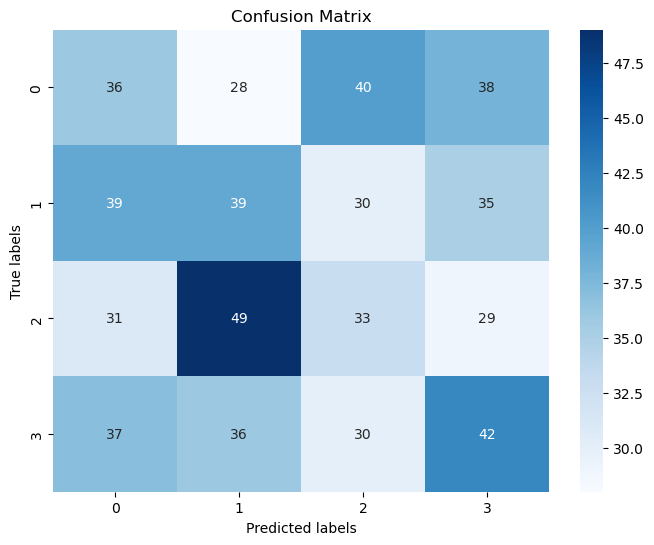

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test dataset
predictions = DN121_model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

# Calculate the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Calculate precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)



from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()